In [1]:
import matplotlib.pyplot as plt
import numpy as np
print(np.__version__)
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

2.2.4


# Generating random numbers from a categorical distribution






In [2]:
probs = torch.tensor([0.1, 0.2, 0.3, 0.4])
print(probs)

tensor([0.1000, 0.2000, 0.3000, 0.4000])


In [3]:
unif = torch.distributions.uniform.Uniform(0, 1)
print(unif.sample())

tensor(0.3224)


In [4]:
cum_sum_prob = torch.cumsum(probs, dim=0)
print(cum_sum_prob)

tensor([0.1000, 0.3000, 0.6000, 1.0000])


In [5]:
symbols  = torch.tensor([1, 2, 3, 4])
print(symbols)
sample = unif.sample()
print(sample)
if cum_sum_prob[0] > sample:
    print(symbols[0])
elif cum_sum_prob[1] > sample:
    print(symbols[1])
elif cum_sum_prob[2] > sample:
    print(symbols[2])
else:
    print(symbols[3])

tensor([1, 2, 3, 4])
tensor(0.6947)
tensor(4)


In [6]:
sample <= cum_sum_prob

tensor([False, False, False,  True])

In [7]:
symbols[sample < cum_sum_prob][0]

tensor(4)

In [8]:
### Even more efficient
index = torch.searchsorted(cum_sum_prob, sample)
print(symbols[index])

tensor(4)


In [9]:
### Vectorized
num_samples = 100000
unif_samples = unif.sample((num_samples,))

index = torch.searchsorted(cum_sum_prob, unif_samples)
our_samples = symbols[index]
print(our_samples)

tensor([4, 4, 4,  ..., 3, 4, 2])


(0.0, 0.5)

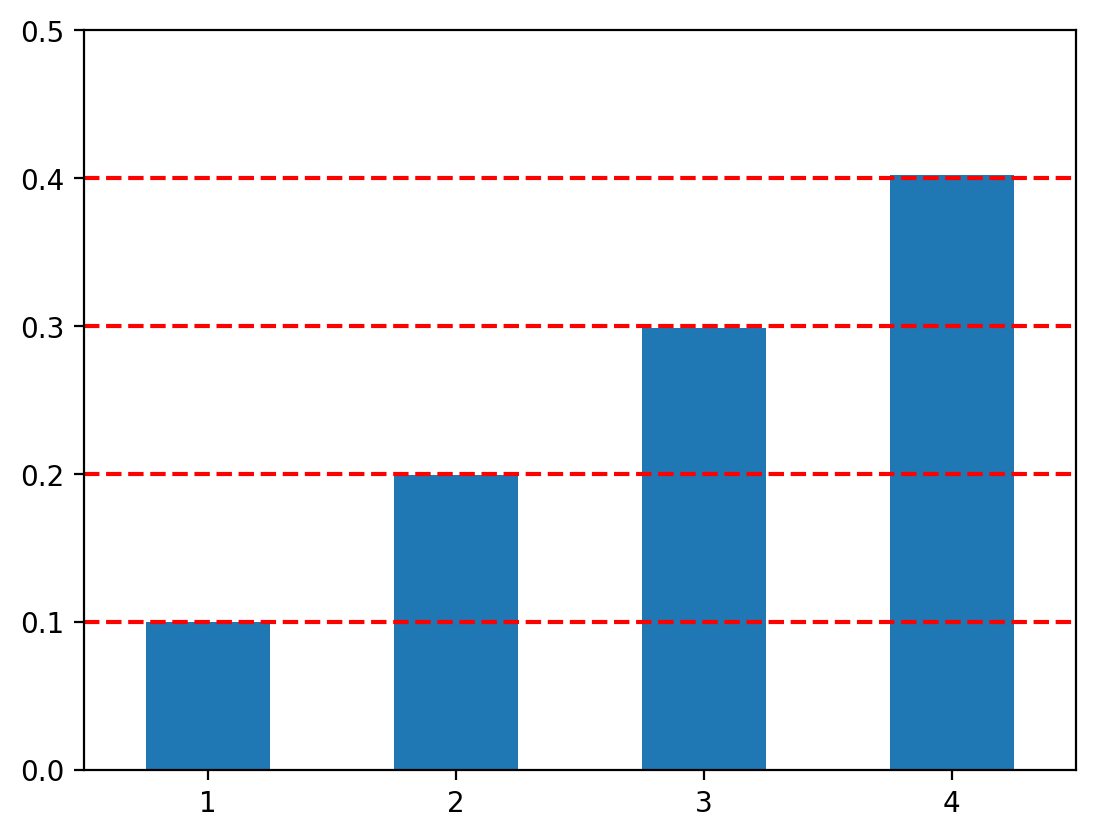

In [10]:
samples_series = pd.Series(our_samples)
samples_series_norm = samples_series.value_counts(normalize=True)
samples_series_norm.sort_index(inplace=True)
samples_series_norm.plot(kind='bar', rot=0)
for i in range(4):
    plt.axhline(probs[i].item(), color='r', linestyle='--')
plt.ylim(0, 0.5)

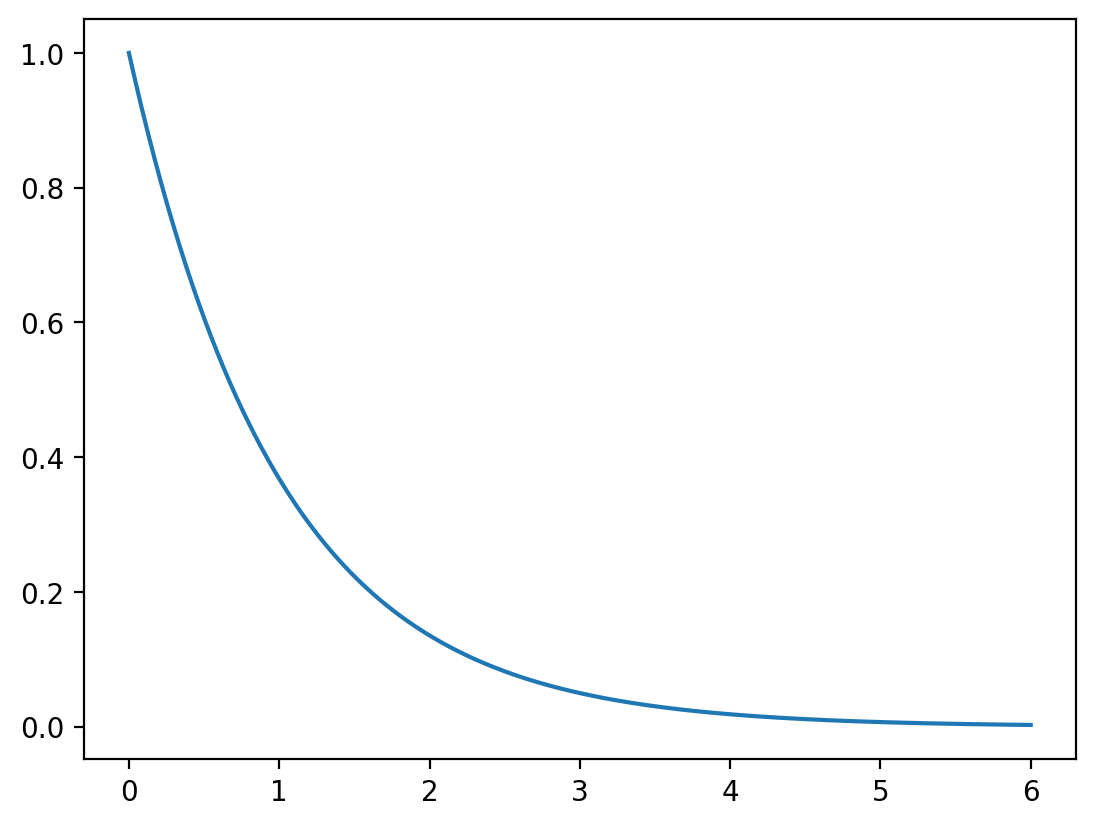

In [16]:
### Generating samples from exponential distribution
rate = 1
exp = torch.distributions.exponential.Exponential(rate)

x_range = torch.linspace(0, 6, 1000)
y = exp.log_prob(x_range).exp()
plt.plot(x_range, y)


In [17]:
def inv_cdf_exp(rate, u):
    return -torch.log(1-u)/rate

In [18]:
U = torch.distributions.uniform.Uniform(0, 1)
u_vec = U.sample((num_samples,))
x_vec = inv_cdf_exp(rate, u_vec)

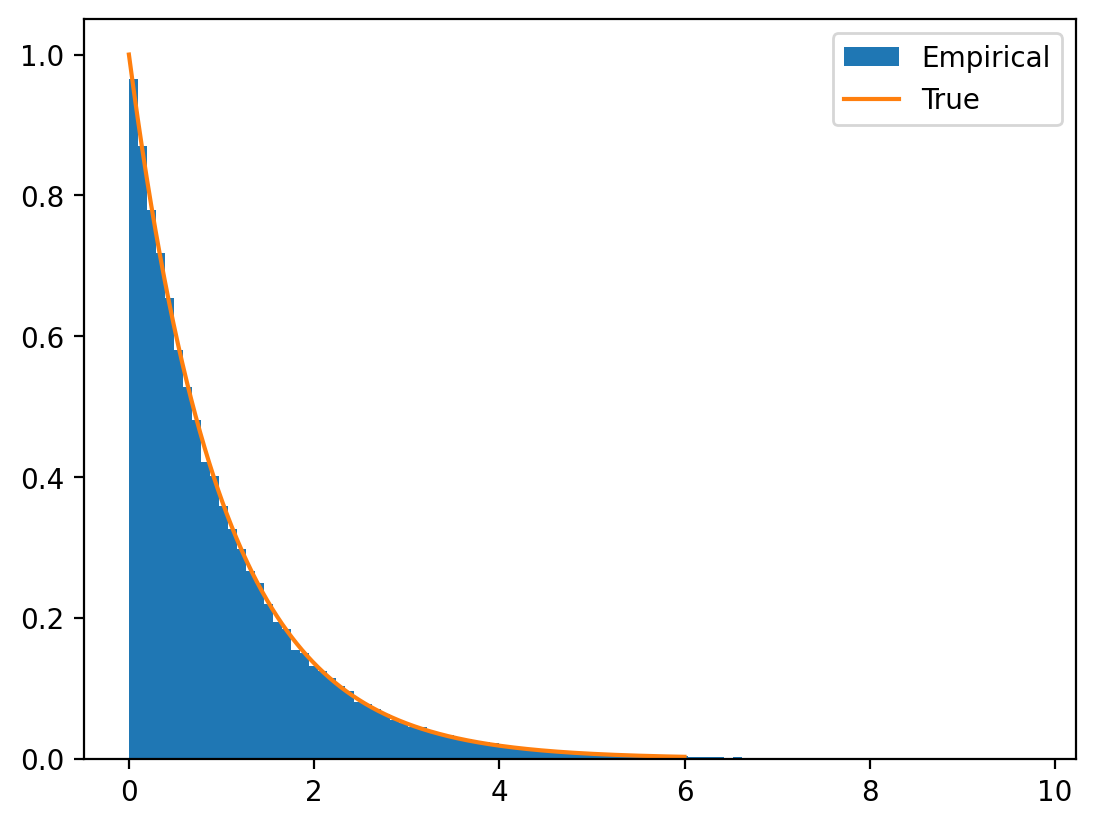

In [19]:
plt.hist(x_vec.numpy(), bins=100, density=True, label='Empirical')
plt.plot(x_range, y, label='True')
plt.legend()

In [20]:
## Generalised implementation when .icdf() is available

def inverse_cdf_sampling(distribution, sample_size=10000):
    """Performs inverse CDF sampling for a given torch distribution."""
    U = torch.rand(sample_size)  # Generate uniform samples
    X = distribution.icdf(U)     # Apply inverse CDF (quantile function)
    return X

In [21]:
X = torch.distributions.Normal(0, 1)
samples = inverse_cdf_sampling(X, 1000)

In [22]:
### Use CDF function
our_dist = torch.distributions.Normal(0, 1)
unif_samples = inverse_cdf_sampling(our_dist, 1000)




(array([0.00844681, 0.        , 0.01689361, 0.00844682, 0.02534042,
        0.02534042, 0.01689361, 0.02534042, 0.04223408, 0.11825541,
        0.07602126, 0.15204252, 0.17738312, 0.15204252, 0.18582993,
        0.22806378, 0.261851  , 0.21117016, 0.287192  , 0.31253184,
        0.38010629, 0.41389352, 0.45612755, 0.40544671, 0.37166023,
        0.43078713, 0.28719142, 0.3885531 , 0.32942545, 0.33787294,
        0.34631907, 0.23651058, 0.20272336, 0.25340419, 0.18583012,
        0.19427616, 0.143596  , 0.10136188, 0.11825505, 0.10980871,
        0.08446789, 0.11825553, 0.05068094, 0.06757432, 0.00844682,
        0.02534037, 0.01689365, 0.01689358, 0.01689365, 0.01689361]),
 array([-2.97191405, -2.85352612, -2.73513818, -2.61675024, -2.49836254,
        -2.3799746 , -2.26158667, -2.14319873, -2.02481079, -1.90642297,
        -1.78803515, -1.66964722, -1.55125928, -1.43287146, -1.31448352,
        -1.19609571, -1.07770777, -0.95931983, -0.84093189, -0.72254419,
        -0.60415626, -0.48

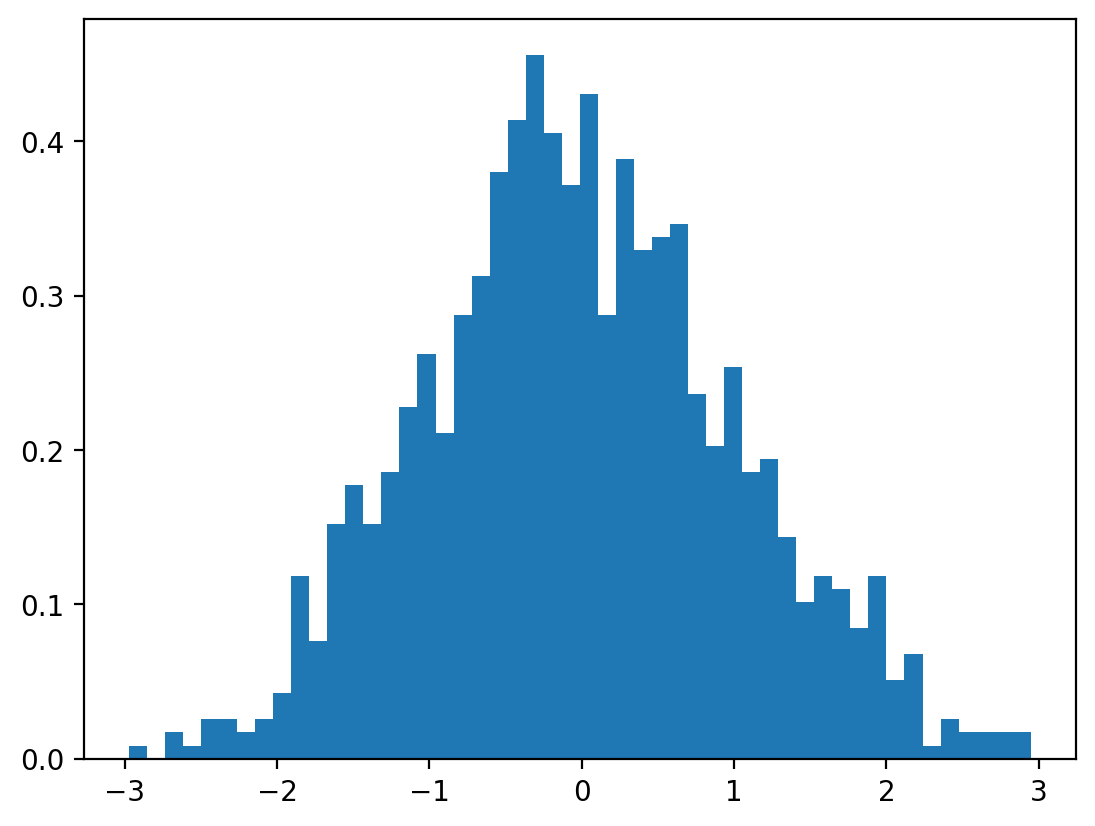

In [23]:
plt.hist(samples.numpy(), bins=50, density=True)

In [25]:
exp.icdf?

Signature: exp.icdf(value)
Docstring:
Returns the inverse cumulative density/mass function evaluated at
`value`.

Args:
    value (Tensor):
File:      ~/base/lib/python3.12/site-packages/torch/distributions/exponential.py
Type:      method